# Lab 4

April 27, 2023

## Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

## Przygotowanie danych
### Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [250]:
import pandas as pd
import numpy as np
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
adult_df = pd.read_csv('dataset/adult-all.csv', header=None,names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [251]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

### Usunięcie brakujących danych.

In [252]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Aby sprawdzić liczbę brakujących wartości zastępujemy "?" nullami.

In [253]:
adult_df.replace('?', np.nan, inplace=True)
adult_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

<AxesSubplot:>

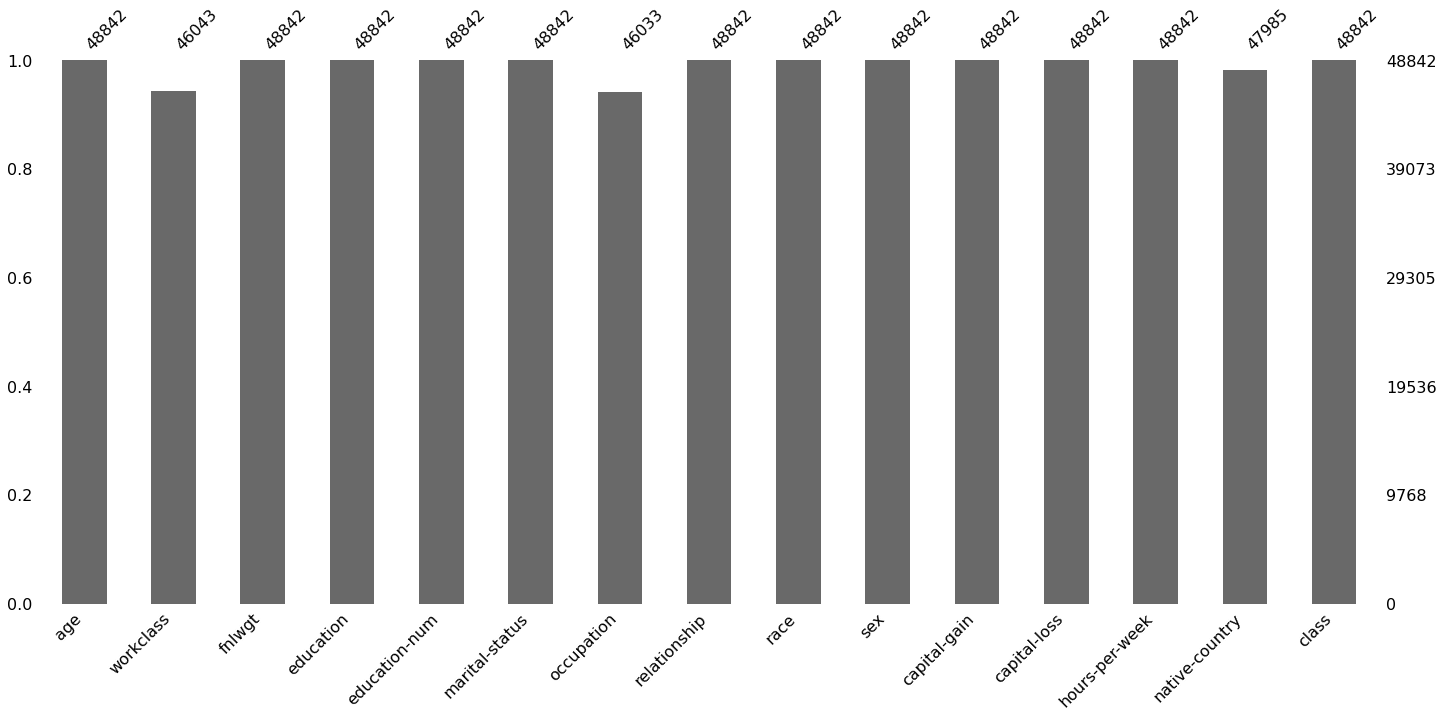

In [254]:
import missingno as msno
msno.bar(adult_df)

Jak widzimy, większość brakujących danych, to dane kategoryczne. Usuniemy wiersze je zawierające.

In [255]:
adult_df=adult_df.dropna()
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Usuwamy również kolumnę "education" zostawiając "education-num", która niesie dla nas tę samą informację.

In [256]:
adult_df = adult_df.drop("education", axis=1)
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


### Normalizacja danych liczbowych





Normalizujemy zmienne numeryczne. W przypadku klasyfikatorów RandomForest oraz ExtraTrees normalizacja danych nie jest wymagana, ponieważ te klasyfikatory radzą sobie z danymi nieznormalizowanymi. Mimo to, wykonanie normalizacji danych jest zalecane, ponieważ można w ten sposób przyspieszyć trenowanie modelu oraz nieznacznie zwiększyć dokładność uzyskanych wyników.


In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]
adult_df[numeric_cols] = scaler.fit_transform(adult_df[numeric_cols])

In [258]:
adult_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.034201,State-gov,-1.062295,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States,<=50K
1,0.866417,Self-emp-not-inc,-1.007438,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States,<=50K
2,-0.041455,Private,0.245284,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
3,1.093385,Private,0.425853,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
4,-0.798015,Private,1.407393,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba,<=50K


Kodujemy teraz wartości nominalne poprzez one-hot-encoding

In [259]:
adult_df = pd.get_dummies(data=adult_df,columns=["workclass","education-num","marital-status","occupation","relationship","race","sex","native-country"])
adult_df.shape

(45222, 104)

In [260]:
adult_df["class"] = (adult_df["class"] == ">50K").astype(np.int8)

adult_df["class"].value_counts()

0    34014
1    11208
Name: class, dtype: int64

# Pomiary

## Pomocnicze funkcje

In [261]:
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def draw_importance_plot(df, rfc):
    important = zip(df.columns, rfc.feature_importances_)
    important = sorted(important, key=lambda x: x[1], reverse=True)
    print("3 Most important features: ", important[:3])
    plt.figure(figsize=(50, 20))
    plt.bar(df.drop("class", axis=1).columns, rfc.feature_importances_, color='maroon', width=0.4)
    plt.xticks(rotation=45)
    plt.show()
    
def draw_roc_curve(X_test, y_test, rfc):
    # compute fpr, tpr, and threshold for various threshold values
    fpr, tpr, threshold = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

    # compute area under the curve
    roc_auc = auc(fpr, tpr)

    # find index of threshold closest to top-left (i.e. best configuration)
    min_dist = (tpr - 1)**2 + fpr**2
    best_idx = np.argmin(min_dist)

    # plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot(fpr[best_idx], tpr[best_idx], 'o', markersize=8,
            label=f'Best Configuration\n(TPR={tpr[best_idx]:.2f}, FPR={fpr[best_idx]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def rf_classify(est,df):
    X, y = df.drop('class', axis=1), df['class']

    # Define the hyperparameter grid to search over
    param_grid = {
        'n_estimators': [10, 50, 100, 250, 500],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1, 2]
    }

    scoring = {
        'accuracy' : make_scorer(accuracy_score), 
        'precision' : make_scorer(precision_score),
        'recall' : make_scorer(recall_score)
    }

    # Define the inner and outer cross-validation folds
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define the grid search object
    grid_search = GridSearchCV(
        estimator=est,
        param_grid=param_grid,
        scoring=['accuracy','precision','recall'],
        cv=inner_cv,
        refit='accuracy',
        n_jobs=-1
    )

    # Perform nested cross-validation
    nested_scores = cross_validate(grid_search, X=X, y=y, cv=outer_cv, scoring=scoring, n_jobs=-1)
    print(f"Accuracy mean: {np.mean(nested_scores['test_accuracy'])} with std: {np.std(nested_scores['test_accuracy'])}")
    print(f"Precision mean: {np.mean(nested_scores['test_precision'])} with std: {np.std(nested_scores['test_precision'])}")
    print(f"Recall mean: {np.mean(nested_scores['test_recall'])} with std: {np.std(nested_scores['test_recall'])}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    best_params=grid_search.best_params_
    
    est.set_params(
        n_estimators=best_params["n_estimators"], 
        max_features=best_params["max_features"],
        min_samples_split=best_params["min_samples_split"],
        min_samples_leaf=best_params["min_samples_leaf"],
        random_state=42
    )

    est.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, est.predict(X_test))
    
    return est, X_test, y_test, accuracy

## Klasyfikator RandomForest

### Klasyfikacja modelu i poszukiwanie najlepszych parametrów

In [263]:
rfc, X_test, y_test, accuracy = rf_classify(RandomForestClassifier(), adult_df)

print("Final accuracy: ", accuracy)

### Wykres ważności cech

3 Most important features:  [('age', 0.11938248913551655), ('fnlwgt', 0.09131529777409651), ('marital-status_Married-AF-spouse', 0.08174033314976868)]


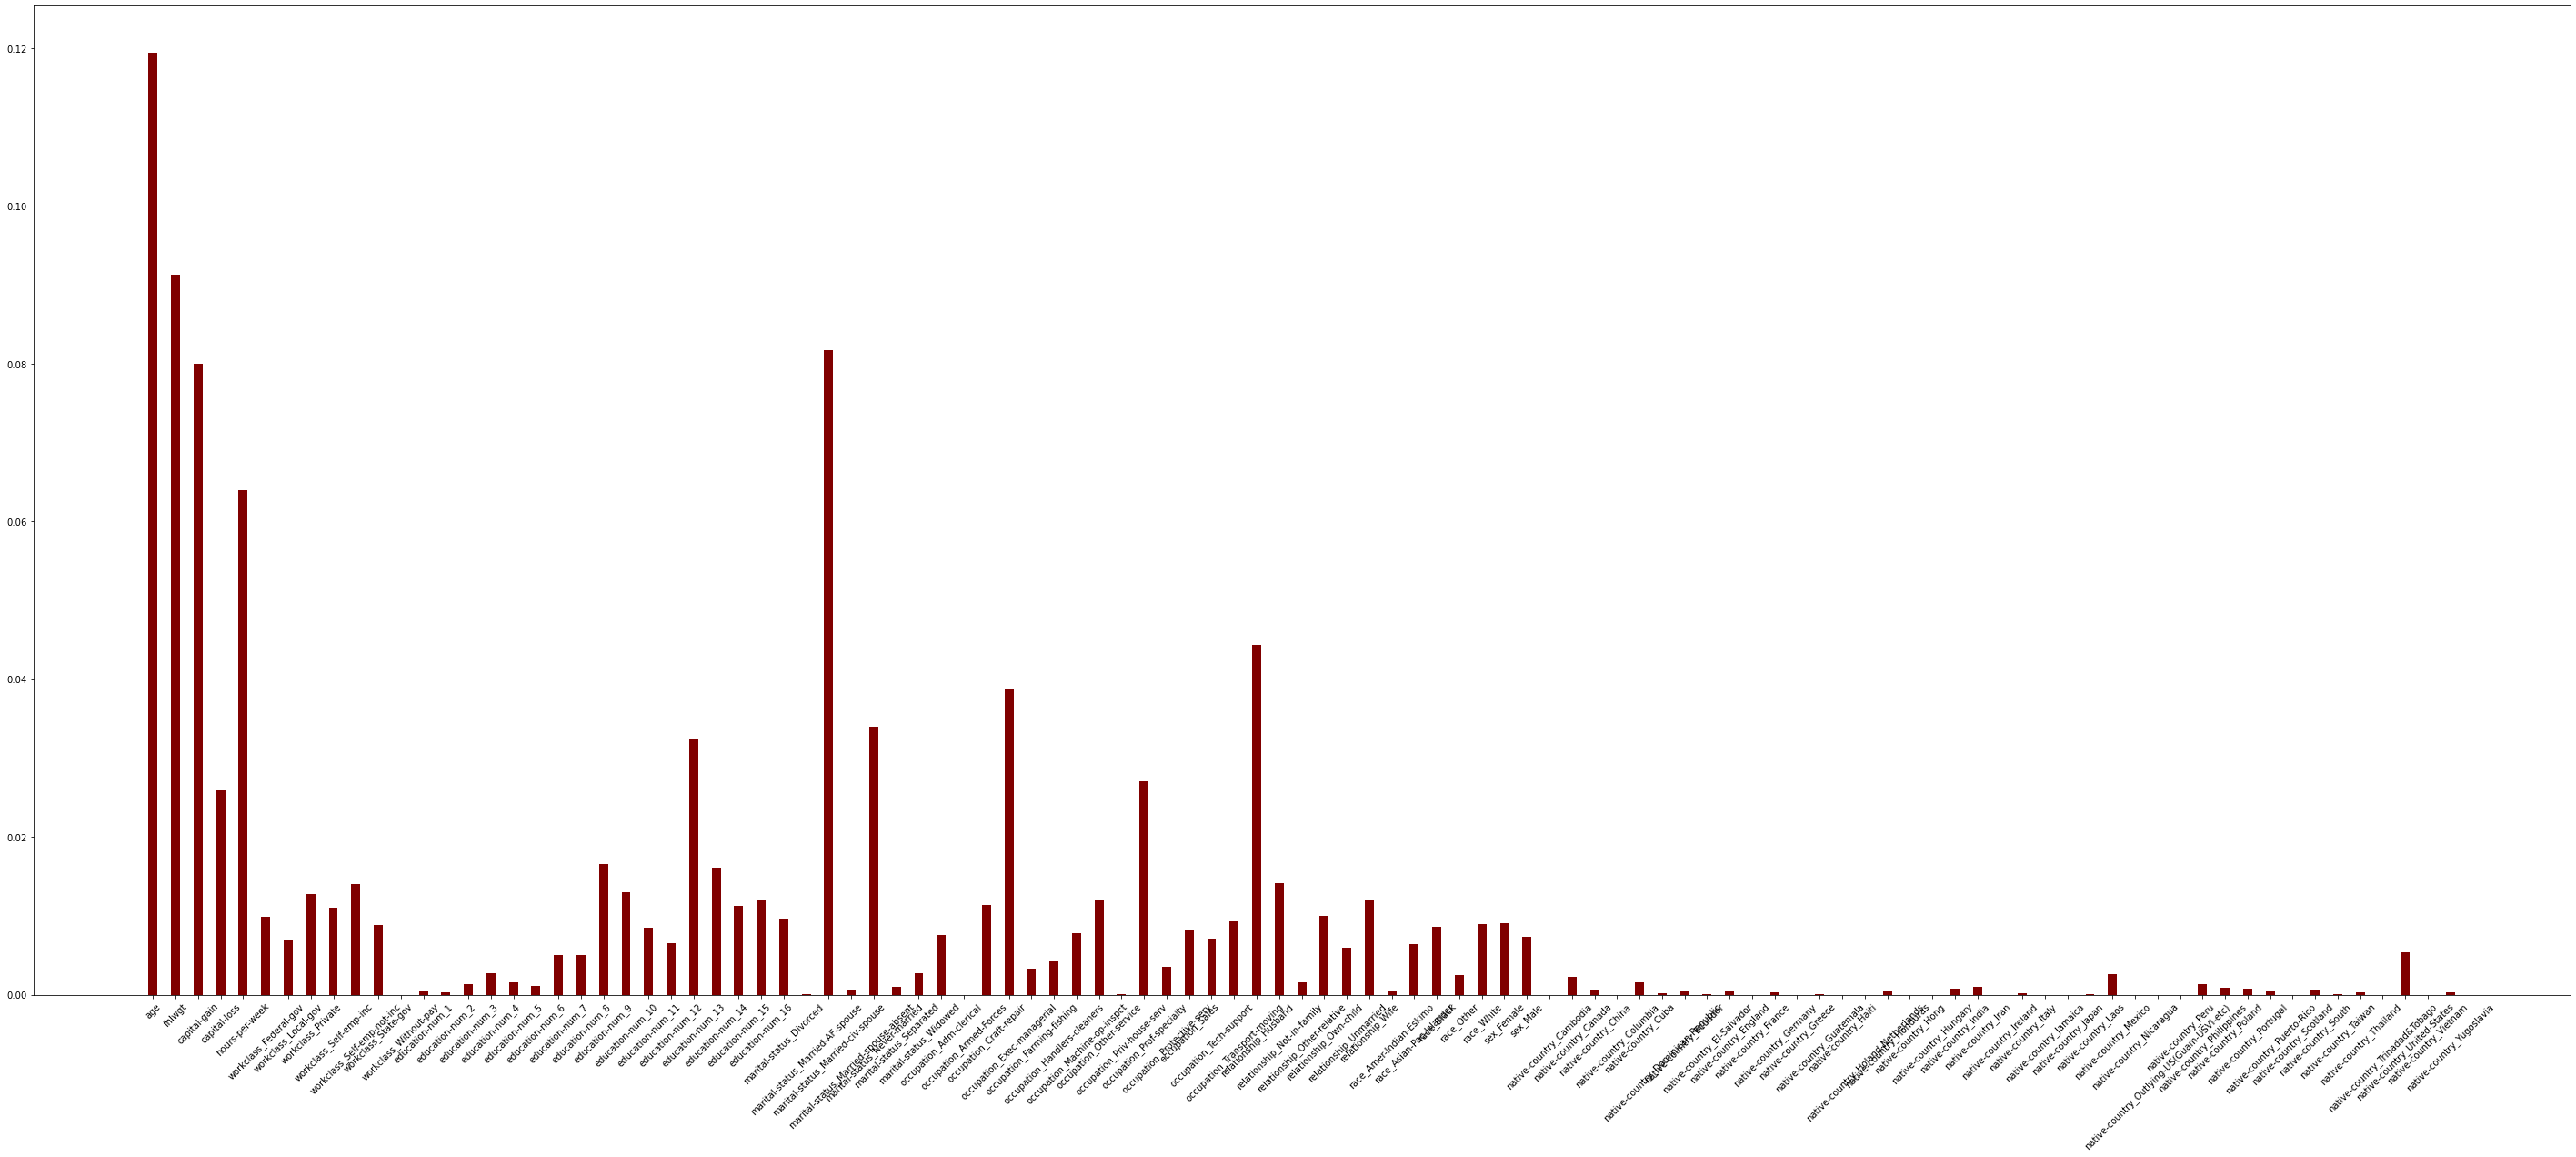

In [ ]:
draw_importance_plot(adult_df, rfc)

### Wykres krzywej ROC

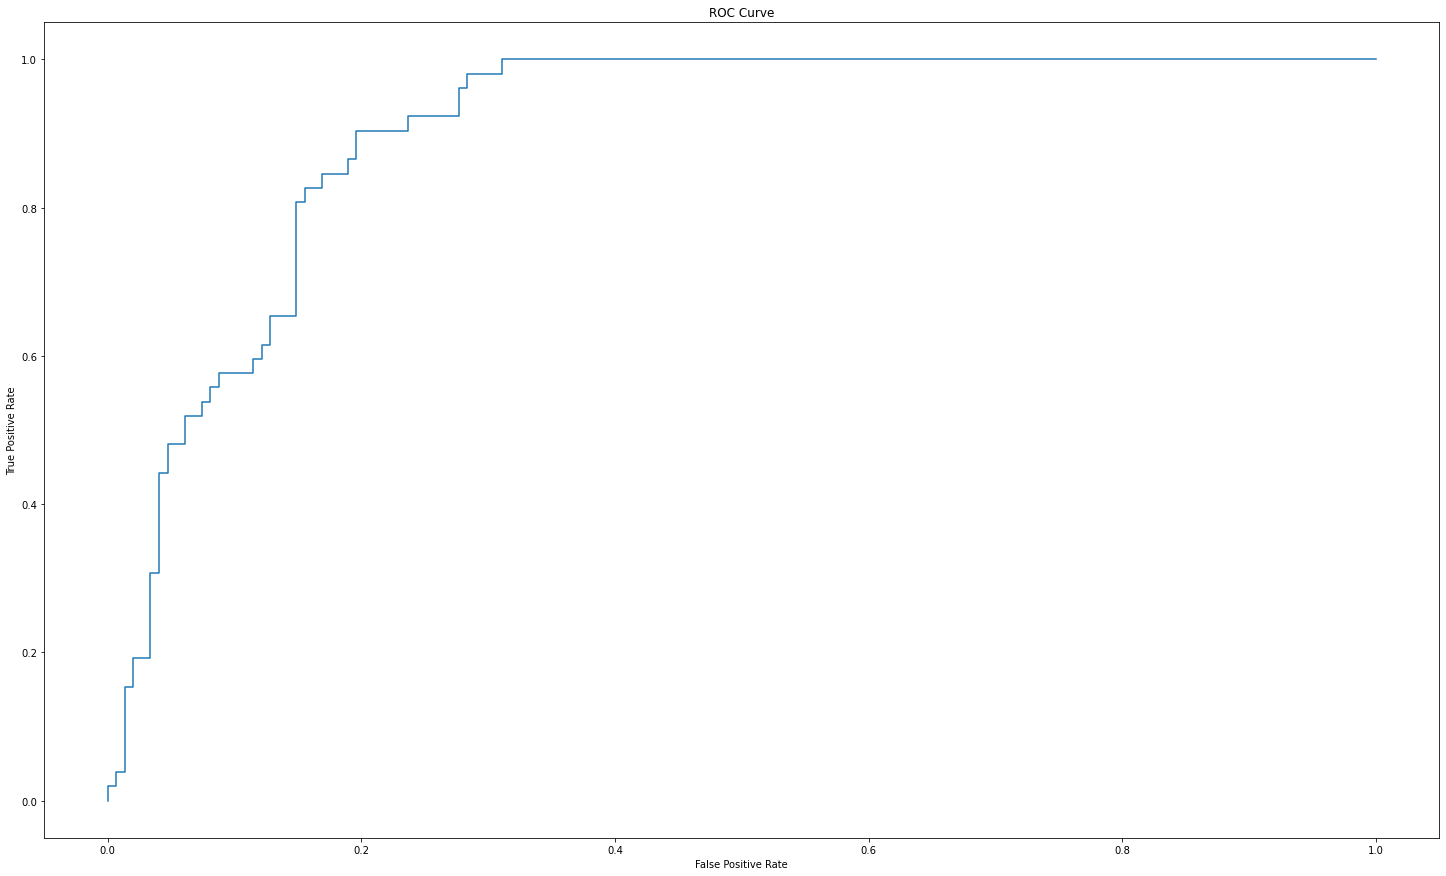

In [ ]:
draw_roc_curve(X_test, y_test, rfc)

### Omówienie wyników

Używając GridSearch oraz 5-krotnej walidacji krzyżowej poszukujemy najlepsych parametrów startowych oraz liczymy wartości unbiased accuracy, precsion i recall.

Po wyciągnięciu średniej wartości oraz odchylenia standardowego dostajemy:

- Accuracy mean: 82% with std: 0.017705076705154463
- Precision mean: 67% with std: 0.08314719766229976
- Recall mean: 49% with std: 0.08498570131069755

Najlepsze wyniki w stosunku do czasu wykonania uzyskujemy używając parametrów:

- n_estimators: 100
- max_features: sqrt
- min_samples_leaf: 2
- min_samples_split: 5


Trzema najważniejszymi cechami podczas uczenia okazały się:

- zysk kapitałowy ~14%
- status małżeński jako "współmażonek w siłach zbrojnych" ~12%
- wiek ~10%

Wyniki te pokrywają się z intuicją, że te cechy mają duży wpływ na przychód.

## Klasyfikator ExtraTrees

In [ ]:
etc, X_test, y_test, accuracy = rf_classify(ExtraTreesClassifier(), adult_df)

print("Final accuracy: ", accuracy)

### Wykres ważności cech

In [ ]:
draw_importance_plot(adult_df, etc)

### Wykres krzywej ROC

In [ ]:
draw_importance_plot(adult_df, etc)

# Wnioski